# **Explainable AI for computer vision**

Grad-CAM(gradient weighted class activation mapping)


1.   Grad-CAM is a technique used in deep learning model, primarily in computer vision tasks, to visualize and understand which regions of an input image are important for the model's prediction.
2.   The goal of Grad-CAM is to produce a heatmap that highlights the regions in the input image that contribute the most to a specific target class prediction. This is particularly useful when dealing with CNN that are challenging to interpret due to their complexity.

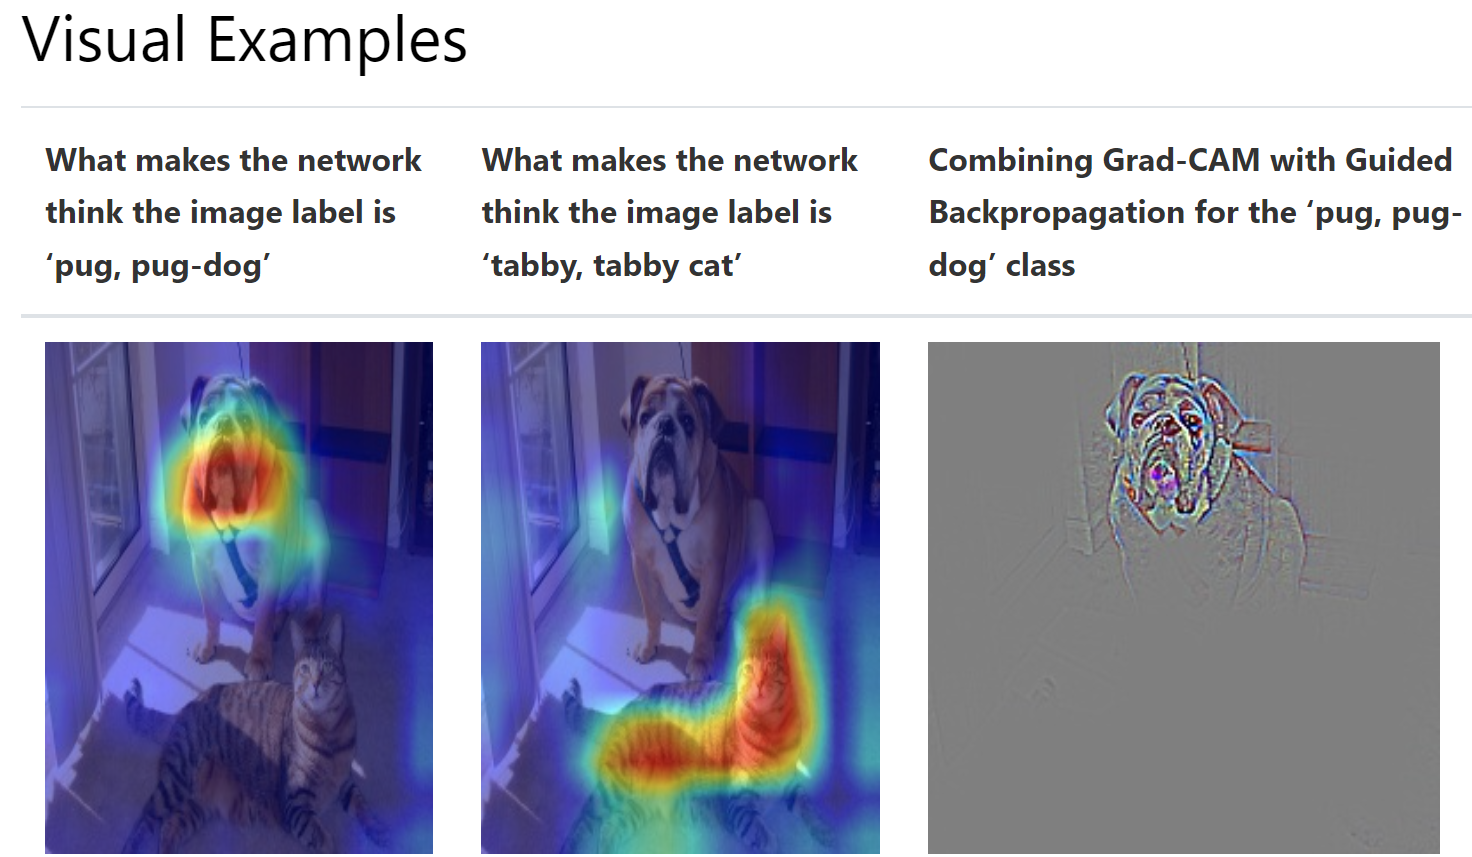





# There are several methods to do the same job

**HiResCAM:**

*Like GradCAM but element-wise multiply the activations with the gradients; provably guaranteed faithfulness for certain models*

**GradCAMElementWise:**
*Like GradCAM but element-wise multiply the activations with the gradients then apply a ReLU operation before summing*

**XGradCAM:**
*Like GradCAM but scale the gradients by the normalized activations*

**AblationCAM**
*Zero out activations and measure how the output drops (this repository includes a fast batched implementation)*

**ScoreCAM**

*Perbutate the image by the scaled activations and measure how the output drops*

**EigenCAM**

*Takes the first principle component of the 2D Activations (no class discrimination, but seems to give great results)*

**EigenGradCAM**

Like EigenCAM but with class discrimination: First principle component of Activations*Grad. Looks like GradCAM, but cleaner *italicized text* *italicized text*

**LayerCAM**

*Spatially weight the activations by positive gradients. Works better especially in lower layers*

# Grad-CAM architecture
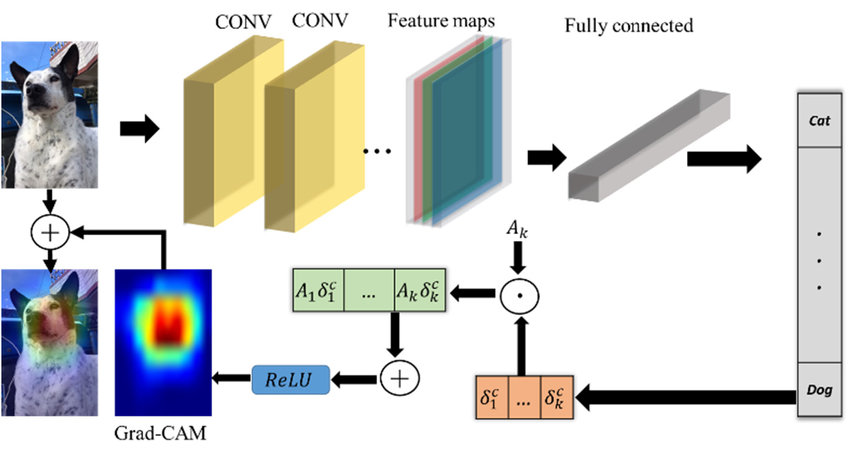

## Integrating Grad-CAM with a Pre-trained ResNet Model in PyTorch

Grad-CAM (Gradient-weighted Class Activation Mapping) can be integrated with a pre-trained ResNet model in PyTorch to visualize which parts of an input image were crucial for the model's classification decision. This process involves registering forward hooks on the last convolutional layer, calculating the gradient of the target class score, and using the gradients to create a heatmap. The heatmap highlights the regions in the image that influenced the model's decision, providing valuable insights into the model's decision-making process. This integration enhances the interpretability of deep learning models, making them more transparent and trustworthy.

Grad-CAM model has been pre-trained on the extensive ImageNet dataset consisting of 1000 different classes. Within this dataset, there are 133 distinct dog classes and a total of 8351 dog images available for analysis. On average, each class is represented by approximately 51.203 images. The dataset exhibits variability, with some dog classes having as many as 70 images, while others have a minimum of 41 images. The specific objective here is to obtain a detailed explanation for the classification of images within the "beagle" class (index[162]), shedding light on which image regions contribute most to the model's decision-making process.

In [1]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=5ee380181ca385601ce9cb1a25f15e77734d940bb8b21879e38c105fc0393e55
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [5]:
import os
import torch
from torchvision.models import resnet50
from pytorch_grad_cam import GradCAM
#from pytorch_grad_cam import GradCAMPlusPlus
from PIL import Image
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2
import numpy as np

def main():
    # Load the pre-trained ResNet50 model
    model = resnet50(pretrained=True)
    target_layers = [model.layer4[-1]]

    # Define a data transformation to resize and normalize the image
  
    # Load image here or use the sample image (replace this)

    image_path = '/content/dog3.jpg'

    rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
    rgb_img = cv2.resize(rgb_img, (500,400))

    """  pre-processing step for images in deep learning models, and it converts the pixel values of the image from integers (0 to 255)
    to floating-point values in the range [0, 1]. This process is known as normalization.
    Normalization is a standard practice in deep learning because it helps to stabilize and improve the convergence of the training process.
    By scaling the pixel values to a range between 0 and 1, the model's optimization algorithm (e.g., gradient descent)
    can work more effectively, as it prevents excessively large updates to the model's weights.
    """


    rgb_img= np.float32(rgb_img)/255

    # Apply the transformation to the image
    #input_tensor = np.array(rgb_img)
    input_tensor=preprocess_image(rgb_img,
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    #print(input_tensor)
    # Construct the Grad-CAM object, we can use GradCAMPlusPlus for better result
    #cam = GradCAMPlusPlus(model=model, target_layers=target_layers)
    cam = GradCAM(model=model, target_layers=target_layers)


    # We have to specify the target we want to generate the Class Activation Maps for.
    # If targets is None, the highest scoring category will be used for every image in the batch.
    targets = [ClassifierOutputTarget(162)] #for beagle dog
    #targets = [ClassifierOutputTarget(285)] #for cat

    # Generate CAM
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    print(grayscale_cam)

    # we can also pass aug_smooth=True and eigen_smooth=True to apply smoothing.
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    #convert the visualization to a numpy array and save it using cv2
    visualization_np = np.array(visualization)



    # Save the visualization to the output directory
    output_dir = '/content/output'  # Replace this with your desired output directory
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, 'visualization.jpg')
    cv2.imwrite(output_path, cv2.cvtColor(visualization, cv2.COLOR_RGB2BGR ))

if __name__ == "__main__":
   main()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Here is the result. As we can see the Grad-CAM highlights the important areas (features) of the image for making prediction by our Resnet model, i.e head and the lower body parts. 

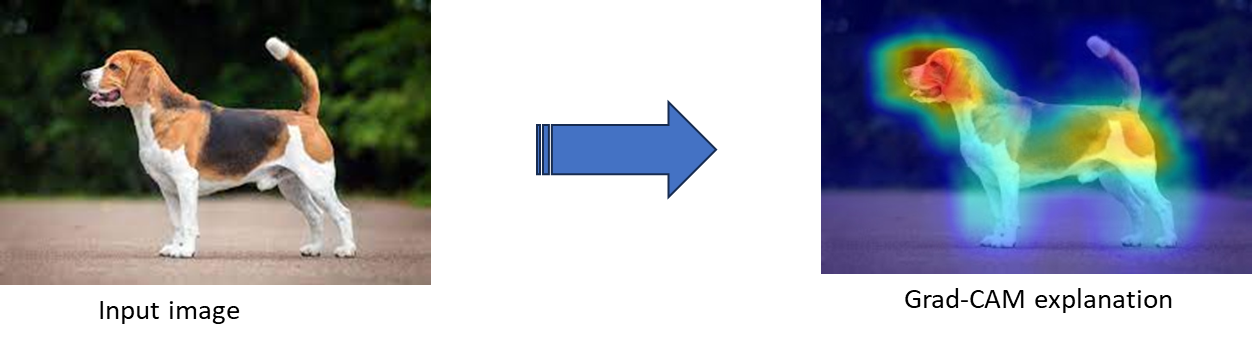

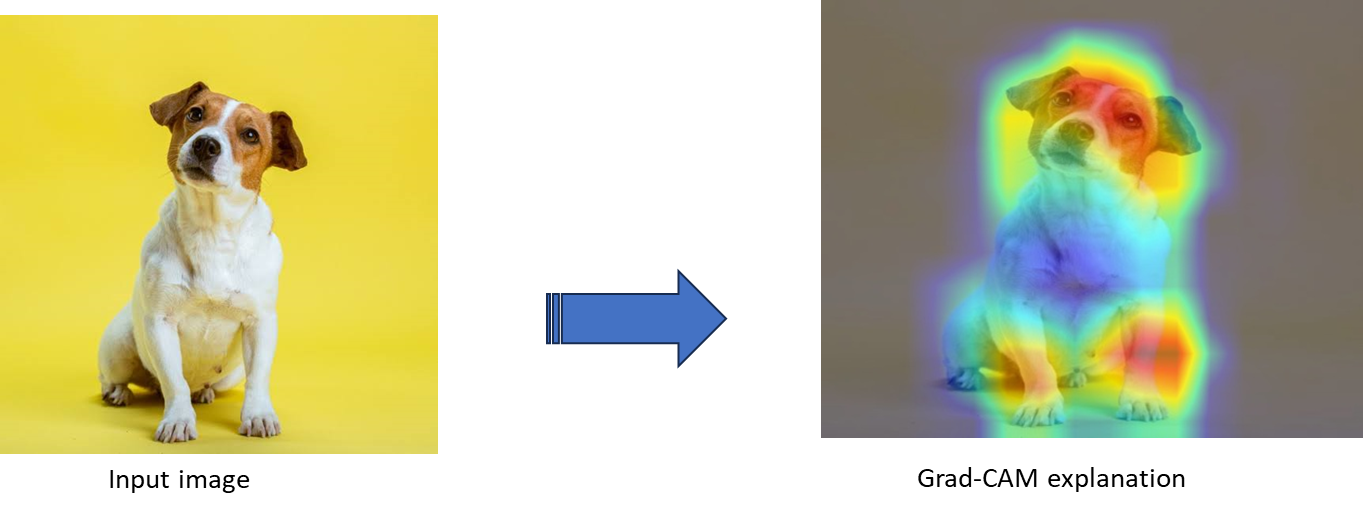